## Problem Statement:

#### With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

### Approach 1: (Solution Courtsey(Intution & Some approaches): https://www.youtube.com/watch?v=13sXWJtNjD4)

## 0. Data Preprocessing:

In [2]:
#Importing necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

# Loading Scikit-Learn packages for modeling
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.decomposition import IncrementalPCA

# from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV

# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier

# from sklearn.metrics import roc_curve, roc_auc_score
# from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

# import warnings
# warnings.filterwarnings("ignore")

In [3]:
# Reading data set
df = pd.read_csv("C:/Users/user/Documents/Python Scripts/Misc_Practice/Sample_-_Superstore.csv", encoding = 'unicode_escape')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# General Information
print(df.dtypes)
print("Information --> ", df.info())
print("Shape --> ", df.shape)
print("Columns --> ", df.columns)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6

In [5]:
#Describe the database with regards some basic statistics:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## 1. Missing value treatment

In [6]:
# Checking for missing values
print(round(100 * (df.isnull().sum() / len(df)), 2))

Row ID           0.0
Order ID         0.0
Order Date       0.0
Ship Date        0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Postal Code      0.0
Region           0.0
Product ID       0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
Sales            0.0
Quantity         0.0
Discount         0.0
Profit           0.0
dtype: float64


In [7]:
df.shape

(9994, 21)

In [8]:
#Working on the Date columns and removing all the date columns as we do not need this for the analysis.
date_cols = [col for col in df.columns if "Date" in col]
date_cols

['Order Date', 'Ship Date']

In [9]:
df.drop(date_cols, axis = 1, inplace=True)

In [10]:
df.shape

(9994, 19)

In [11]:
all_cols = df.columns[df.isnull().sum() > 0]
all_cols

Index([], dtype='object')

In [12]:
df.drop_duplicates(keep='first', inplace=True)

In [13]:
df.shape

(9994, 19)

In [14]:
df.head(2)

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


## 2. EDA:

In [15]:
#Summing up the values of profit and sales:
print("Total Profit", df['Profit'].sum())
print("Total Sales", df['Sales'].sum())

Total Profit 286397.0217
Total Sales 2297200.8603000003


In [16]:
#Checking State-wise Sales:
state_sales = df.groupby('State').Sales.sum().sort_values(ascending=False).head(5)

In [17]:
state_sales.head()

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Name: Sales, dtype: float64

#### As per the above stats, California has the highest number of Sales overall. 

Text(0.5, 1.0, 'Representation of the State-wise Sales')

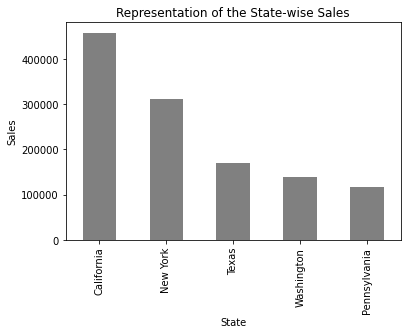

In [18]:
#Now, let's understand the same using some vizualization:
state_sales.plot(kind="bar", color="Grey")
plt.xlabel("State")
plt.ylabel("Sales")
plt.title("Representation of the State-wise Sales")

# plt.subplot(3,2,4)
# plt.pie(df_pie['Sales'], labels=df_pie['state_sales'], colors=['#F05454','#30475E','#222831','#DDDDDD'])
# plt.title("Composition of Category for Sales")

In [19]:
#Checking State_profit:
state_profit = df.groupby('State').Profit.sum().sort_values(ascending=False).head(5)
state_profit.head()

State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Name: Profit, dtype: float64

#### As per the above stats, California has the highest number of Profit overall. 

Text(0.5, 1.0, 'Composition of Category for Sales')

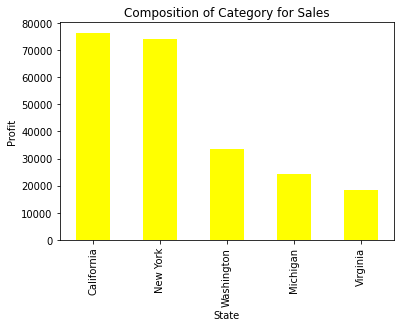

In [20]:
#Now, let's understand the same using some vizualization
state_profit.plot(kind="bar", color="Yellow")
plt.xlabel("State")
plt.ylabel("Profit")
plt.title("Composition of Category for Sales")

# plt.subplot(3,2,4)
# plt.pie(df_pie['Sales'], labels=df_pie['state_sales'], colors=['#F05454','#30475E','#222831','#DDDDDD'])
# plt.title("Composition of Category for Sales")

#### As a general conclusion, we can say that California and New York have the highest Sales and Profit.

In [21]:
#Specific columns which will determine our key components:

df_num = df[['Profit', 'Sales', 'Discount', 'Quantity']]

In [22]:
df_num.shape

(9994, 4)

In [23]:
#Checking the correlation of the variables/params:
df_num.corr()

,Profit,Sales,Discount,Quantity
Profit,1.000000,0.479064,-0.219487,0.066253
Sales,0.479064,1.000000,-0.028190,0.200795
Discount,-0.219487,-0.028190,1.000000,0.008623
Quantity,0.066253,0.200795,0.008623,1.000000


<AxesSubplot:>

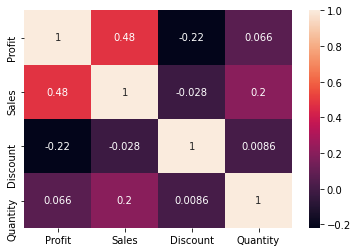

In [24]:
sns.heatmap(df_num.corr(), annot=True)

#### Positive corelation between Sales and Profit, while it's the opposite for Discount and Profit.

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

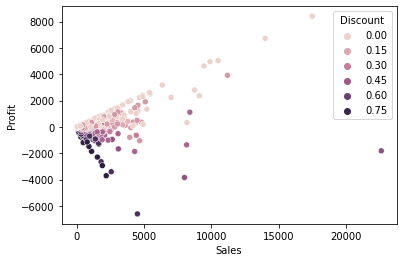

In [25]:
#Further analysis using scatter-plot:
plt.figure(figsize =(6,4))
sns.scatterplot(x='Sales', y='Profit', hue='Discount', data=df, legend='auto')

#### It is clearly evident from the graph that as Discount increases, Profit goes down.

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

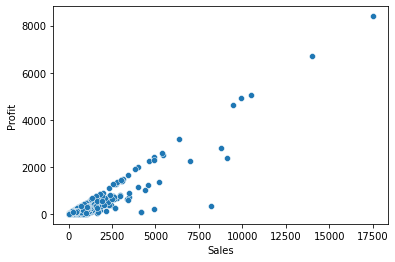

In [26]:
#When the discount is zero:

disct_zero = df[df['Discount']==0]
sns.scatterplot(x='Sales',  y='Profit', data=disct_zero)

#### So, when the discount is zero, we see there is a positive relation between Sales and Profit.

In [27]:
disct_zero.head()

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714
5,6,CA-2014-115812,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7,0.0,14.1694
6,7,CA-2014-115812,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.28,4,0.0,1.9656


<AxesSubplot:>

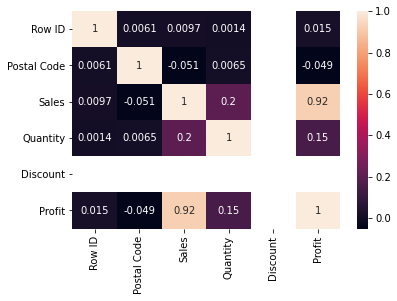

In [28]:
sns.heatmap(disct_zero.corr(), annot=True)

#### The corelation between Sales and Profit stands at 0.92

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

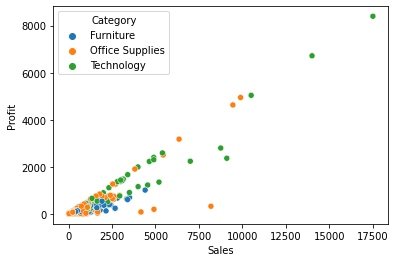

In [29]:
sns.scatterplot(x='Sales',  y='Profit', data=disct_zero, hue='Category')

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

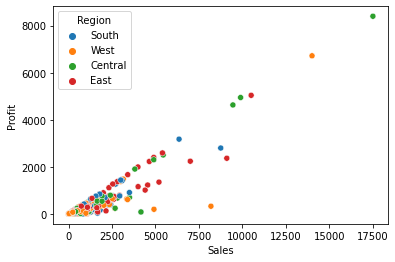

In [30]:
sns.scatterplot(x='Sales',  y='Profit', data=disct_zero, hue='Region')

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

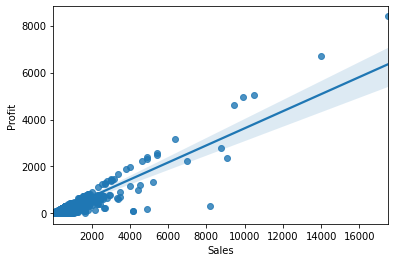

In [31]:
sns.regplot(x=disct_zero['Sales'], y=disct_zero['Profit'])

In [32]:
#When discount is not zero:

disct_zero1 = df[df['Discount']!=0]

In [33]:
disct_zero1.shape

(5196, 19)

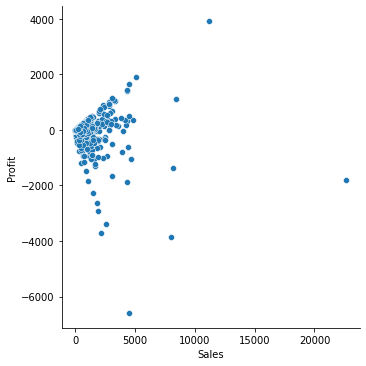

In [34]:
sns.relplot(x='Sales',  y='Profit', data=disct_zero1)

In [35]:
disct_zero1.head()

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,4,US-2015-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
7,8,CA-2014-115812,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
10,11,CA-2014-115812,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


#### As per what the stats reveal, `Furniture` is a loss making category when given dscount.

                    Profit
Category                  
Furniture       -30.880781
Office Supplies  -2.766761
Technology       12.925570


<AxesSubplot:xlabel='Category'>

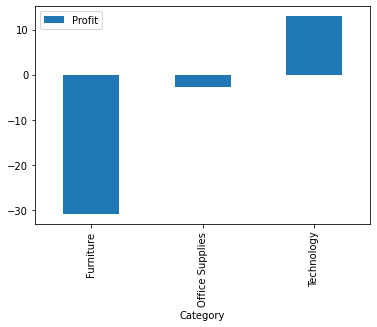

In [36]:
pivot_plot=pd.pivot_table(disct_zero1,index='Category', values='Profit')
print(pivot_plot)
pivot_plot.plot(kind='bar')

Text(0, 0.5, 'Profit')

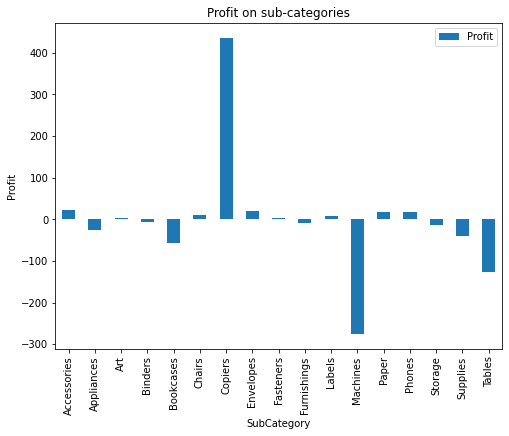

In [37]:
pivot_plot=pd.pivot_table(disct_zero1,index='Sub-Category', values='Profit')
pivot_plot.plot(kind='bar', figsize = (8,6))
plt.title("Profit on sub-categories")
plt.xlabel("SubCategory")
plt.ylabel("Profit")

#### Copiers has the highest number of profit margin within the sub-categories while Machines and Tables suffer most losses.

Text(0, 0.5, 'Sales')

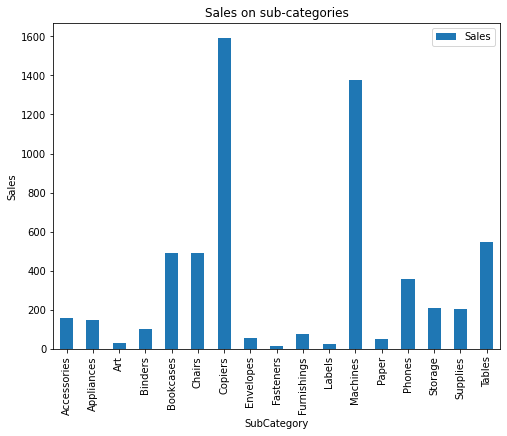

In [38]:
pivot_plot=pd.pivot_table(disct_zero1,index='Sub-Category', values='Sales')
pivot_plot.plot(kind='bar', figsize = (8,6))
plt.title("Sales on sub-categories")
plt.xlabel("SubCategory")
plt.ylabel("Sales")

#### Machines and Tables have second highest sales but profit is down due to heavy discounts.

<AxesSubplot:xlabel='Region', ylabel='Profit'>

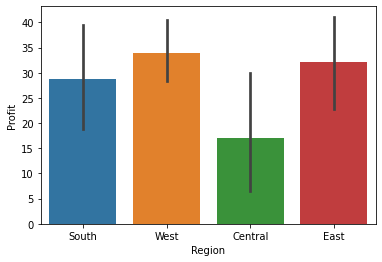

In [39]:
sns.barplot(x='Region', y='Profit', data=df)

<AxesSubplot:xlabel='Region', ylabel='Profit'>

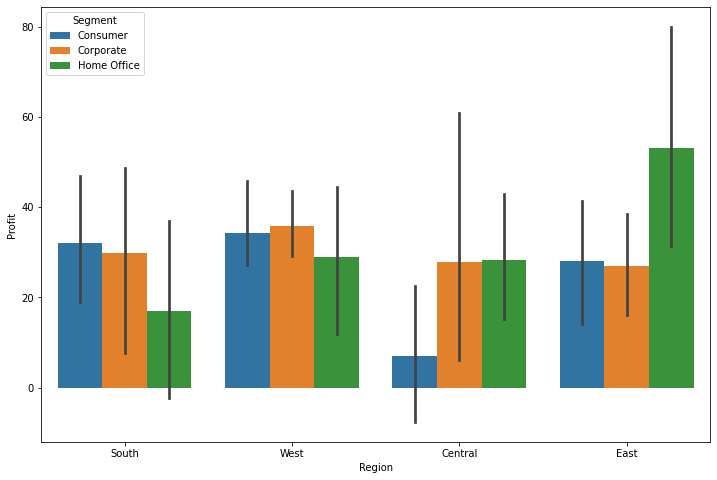

In [40]:
plt.figure(figsize=(12,8))
sns.barplot(x='Region', y='Profit',hue='Segment',data=df)
# plt.show()

#### Central Region has less `profit` in `customer` segment.

<AxesSubplot:xlabel='Region', ylabel='Profit'>

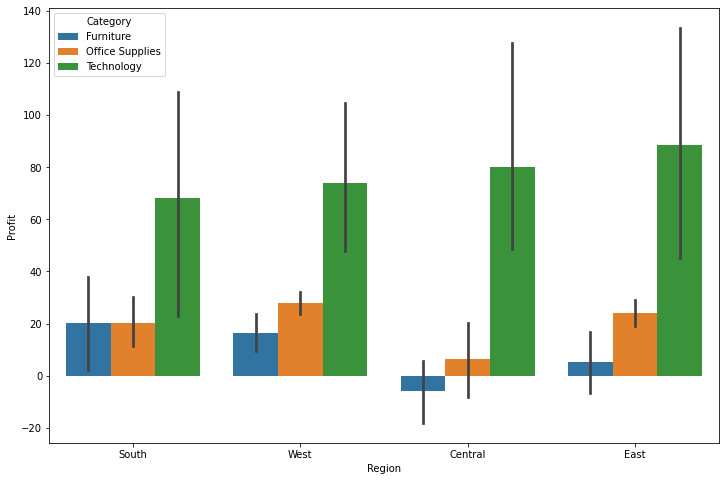

In [41]:
plt.figure(figsize=(12,8))
sns.barplot(x='Region', y='Profit',hue='Category',data=df)
# plt.show()

#### Central Region is making `loss` in `furniture` segment.

In [42]:
data_central = df[df['Region']=='Central']

In [43]:
data_central.head()

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
14,15,US-2015-118983,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,5,0.8,-123.8580
15,16,US-2015-118983,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.544,3,0.8,-3.8160
16,17,CA-2014-105893,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,Wisconsin,53711,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.880,6,0.0,13.3176
21,22,CA-2016-137330,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,68025,Central,OFF-AR-10000246,Office Supplies,Art,Newell 318,19.460,7,0.0,5.0596
22,23,CA-2016-137330,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,68025,Central,OFF-AP-10001492,Office Supplies,Appliances,"Acco Six-Outlet Power Strip, 4' Cord Length",60.340,7,0.0,15.6884


<AxesSubplot:xlabel='Category', ylabel='Profit'>

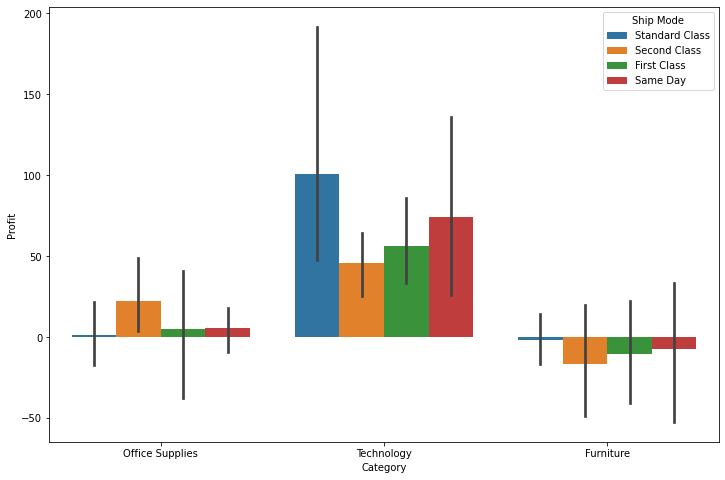

In [44]:
plt.figure(figsize=(12,8))
sns.barplot(x='Category', y='Profit',hue='Ship Mode',data=data_central)
# plt.show()

#### `Loss` in `furniture` category irrespective of ship-mode.

In [45]:
df_num.shape

(9994, 4)

In [46]:
df_fur = df[df['Category']=='Furniture']

In [47]:
df_fur.shape

(2121, 19)

<AxesSubplot:>

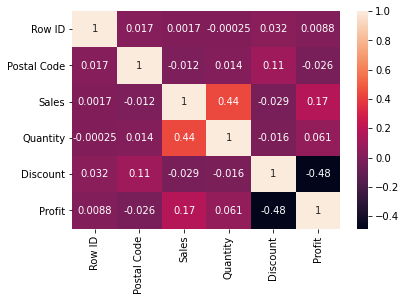

In [48]:
sns.heatmap(df_fur.corr(), annot=True)

#### `Postal Code` is the only field as of now showing positive relation with `Discount`

In [49]:
data_central.head(2)

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
14,15,US-2015-118983,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,5,0.8,-123.858
15,16,US-2015-118983,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.544,3,0.8,-3.816


In [50]:
data_central.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.059395,-0.007940,-0.047468,0.060753,0.016707
Postal Code,0.059395,1.000000,-0.071729,-0.008005,0.467951,-0.151432
Sales,-0.007940,-0.071729,1.000000,0.183129,-0.109452,0.640724
Quantity,-0.047468,-0.008005,0.183129,1.000000,0.014794,0.047547
Discount,0.060753,0.467951,-0.109452,0.014794,1.000000,-0.225365
Profit,0.016707,-0.151432,0.640724,0.047547,-0.225365,1.000000


<AxesSubplot:xlabel='State', ylabel='Profit'>

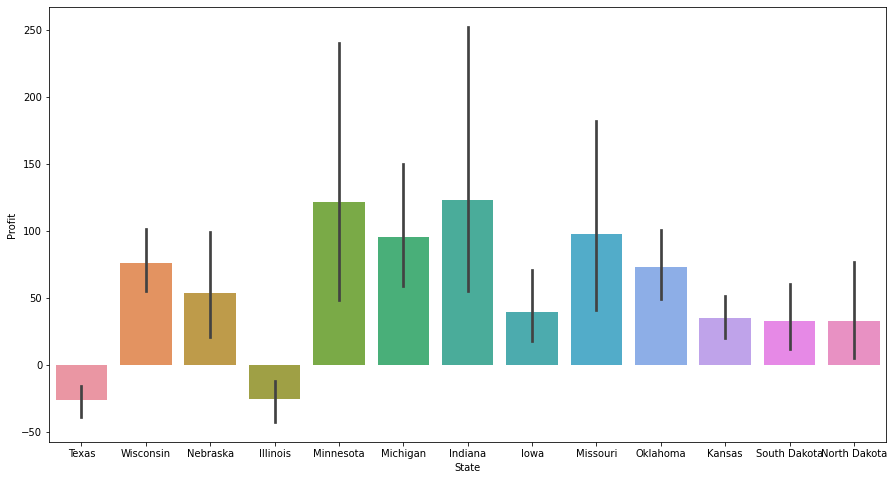

In [51]:
plt.figure(figsize=(15,8))
sns.barplot(x='State', y='Profit',data=data_central)

#### Texas and Illionos are incuring losses.

Text(0.5, 1.0, 'State-wise discount')

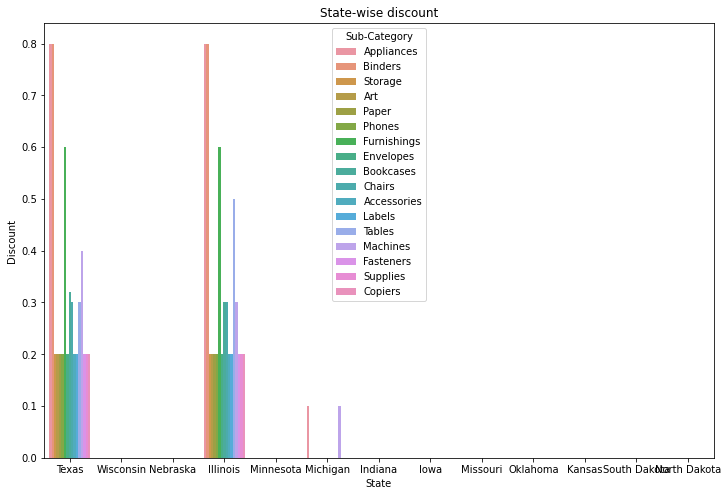

In [52]:
plt.figure(figsize=(12,8))
sns.barplot(x='State', y='Discount',hue='Sub-Category',data=data_central)
plt.title('State-wise discount')

#### Heavy Discounts are being given in Texas and Illinos. 60% on furniture.

<AxesSubplot:xlabel='Category'>

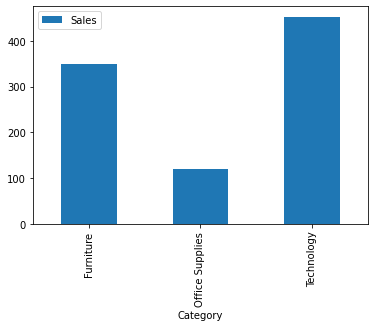

In [53]:
pivot_plot1=pd.pivot_table(df,index='Category', values='Sales')
pivot_plot1.plot(kind='bar')

<AxesSubplot:xlabel='Category'>

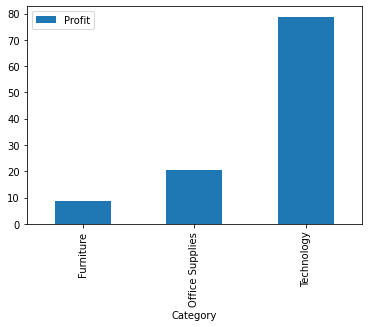

In [54]:
pivot_plot1=pd.pivot_table(df,index='Category', values='Profit')
pivot_plot1.plot(kind='bar')

### Approach 2: (Solution Courtsey(Intution & Some approaches): https://www.kaggle.com/code/vivek468/what-visualizations-should-you-use)

In [55]:
import numpy as np 
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import squarify
import warnings
warnings.filterwarnings('ignore')

In [56]:
# !pip install squarify

In [57]:
# !python.exe -m pip install --upgrade pip

In [58]:
# Reading data set
df = pd.read_csv("C:/Users/user/Documents/Python Scripts/Misc_Practice/Sample_-_Superstore.csv", encoding = 'unicode_escape')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Comparing Categorical & Numerical Values:

     Region     Sales
0     South  261.9600
1     South  731.9400
2      West   14.6200
3     South  957.5775
4     South   22.3680
...     ...       ...
9989  South   25.2480
9990   West   91.9600
9991   West  258.5760
9992   West   29.6000
9993   West  243.1600

[9994 rows x 2 columns]
              Sales
Region             
South    241.803645
East     238.336110
West     226.493233
Central  215.772661


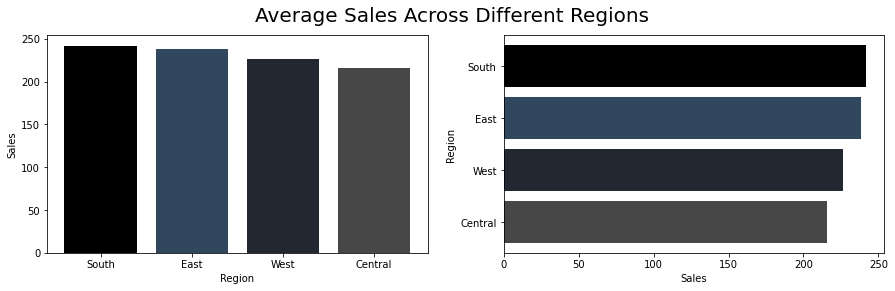

In [59]:
# First of all, we are going to take only the subset of data for our purpose. (To keep things simple)
df_bar = df[['Region','Sales']]
print(df_bar)

# Grouping the DataFrame based on Regions and taking mean of profit across each of them.
# The reason for sorting is to show the larger values at the beginning (Best Practice)
df_bar = df_bar.groupby('Region').mean().sort_values(by='Sales', ascending=False)
print(df_bar)

plt.figure(figsize=[15,4]) # Setting the figure size

# Visualizing using Bar Chart
plt.suptitle("Average Sales Across Different Regions", size=20)

# Plotting the BarChart
plt.subplot(1,2,1)
plt.bar(x=df_bar.index, height='Sales', color=['#000000','#30475E','#222831','#474747'], data=df_bar)
# for index, value in enumerate(x1):
#     plt.text(value, index,
#              str(value))
plt.xlabel("Region")
plt.ylabel("Sales")

# Plotting the Horizontal BarChart (Use this if there are many unique values for a Categorical Feature)
plt.subplot(1,2,2)
plt.barh(y=df_bar.index, width='Sales', color=['#000000','#30475E','#222831','#474747'], data=df_bar)
plt.gca().invert_yaxis() # Inverting the Y Axis
plt.xlabel("Sales")
plt.ylabel("Region")

plt.show()

##### A horizontal BarChart is preferred when the number of unique values in the Categorical Feature is more. 

##### Coming to what the trend says, it says that we have maximum sales in South. We further proceed to check the trend over a period of time as we are the observing the current trend above.

## Checking Trend Over Period Of Time:

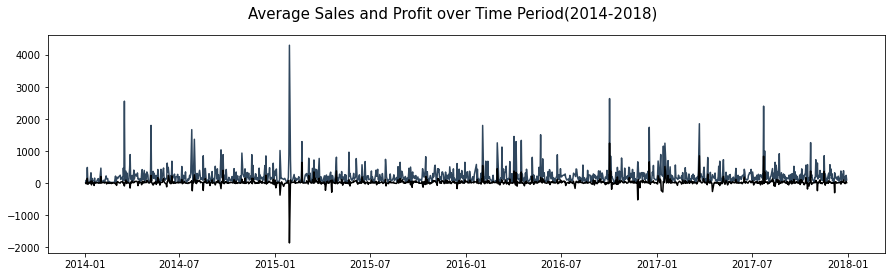

In [60]:
#Taking only the subset of data for our purpose. (To keep things simple):
df_line = df[['Order Date','Sales','Profit']].sort_values('Order Date') # Chronological Ordering
df_line['Order Date'] = pd.to_datetime(df_line['Order Date']) # Converting into DateTime
# print(df_line['Order Date'])
df_line = df_line.groupby('Order Date').mean() # Groupby to get the average Sales and Profit on each day.
# print(df_line)

# Visualizing the Line Chart
plt.figure(figsize=[15, 4])
plt.plot(df_line.index, 'Sales', data=df_line, color='#30475E') # Avg Sales over Time
plt.plot(df_line.index, 'Profit', data=df_line, color='#000000') # Avg Profit over Time
plt.suptitle("Average Sales and Profit over Time Period(2014-2018)", size=15)

plt.show()

#### The hsitorical data shows us the general trend for Sales vs profit. As per the data, we can derive that even though Sales are high, in most cases profit is not spiking that much.

## Checking Sample Distribution:

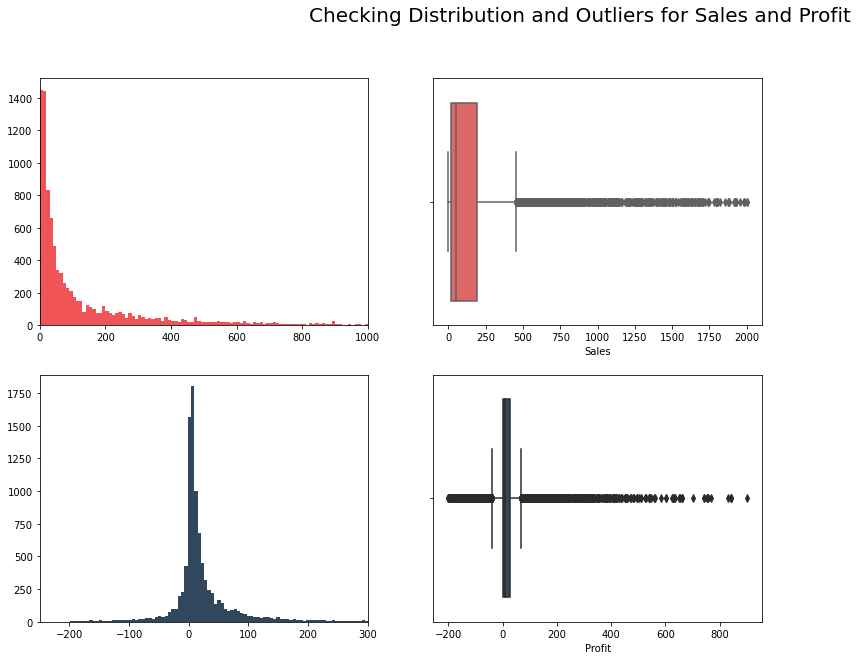

In [61]:
#Taking only the subset of data for our purpose. (To keep things simple)
df_dist = df[['Sales','Profit']]

# Fixing the Outliers:

df_dist = df_dist[df_dist['Sales'] <= 2000]
df_dist = df_dist[df_dist['Profit'] <= 2000]
df_dist = df_dist[df_dist['Profit'] >= -200]

# Visualizing the histograms
plt.figure(figsize=[20,10])

plt.suptitle("Checking Distribution and Outliers for Sales and Profit", size=20)

# Histogram for Sales
plt.subplot(2,3,1)
plt.hist(df_dist['Sales'], bins=200, color='#F05454')
plt.xlim(0,1000)

# Boxplot of  for Sales
plt.subplot(2,3,2)
sns.boxplot(df_dist['Sales'], color='#F05454')

# # KDEPlot for Sales
# plt.subplot(2,3,3)
# sns.kdeplot(x=df_dist['Sales'], color='#F05454')

################################################################
# Histogram for Profit
plt.subplot(2,3,4)
plt.hist(df_dist['Profit'], bins=200, color='#30475E')
plt.xlim(-250,300)

# Boxplot of  for Profit
plt.subplot(2,3,5)
sns.boxplot(df_dist['Profit'], color='#30475E')

# # KDEPlot for Sales
# plt.subplot(2,3,6)
# sns.kdeplot(x=df_dist['Profit'], color='#30475E')

plt.show()

#### As per the above vizualization, we can clearly dervive the sample data distribution using Histogram and the outliers using Boxplot.

## Checking the relationship between numerical columns:

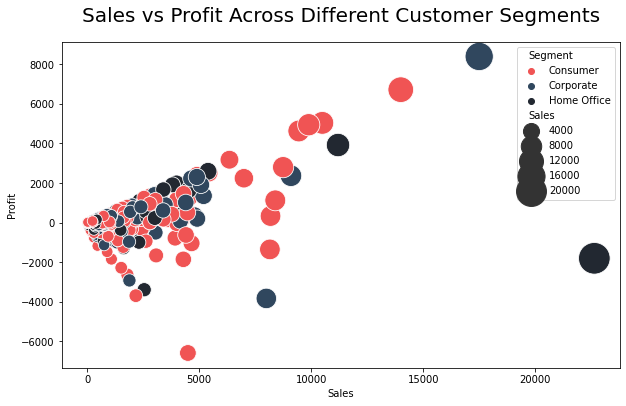

In [62]:
# Again taking a subset of data (To keep things simple)
df_scatter = df[['Sales','Profit','Segment']]

# Visualizing the ScatterPlot
plt.figure(figsize=[10,6])
# Profit in the Y axis, and Sales in the X. Hue will classify the dots according to Segment.
# The size of the dots are according to the volumen of "Sales".
sns.scatterplot(x=df_scatter['Sales'], y=df_scatter['Profit'], hue=df_scatter['Segment'], palette=['#F05454','#30475E','#222831'], size=df_scatter["Sales"], sizes=(100,1000), legend='auto') 
plt.title("Sales vs Profit Across Different Customer Segments", size=20, pad=20)
plt.show()

#### ScatterPlots are a great way to visualize correlation between different features. Here, we see and can conclude that most of our orders/sales are from Home Office users, follwed by Corporate and then normal consumers.

## Checking the composition of features:

        Ship Mode         Sales       Profit
0     First Class  3.514284e+05   48969.8399
1        Same Day  1.283631e+05   15891.7589
2    Second Class  4.591936e+05   57446.6354
3  Standard Class  1.358216e+06  164088.7875


Text(0.5, 1.0, 'Composition of Category for Profit')

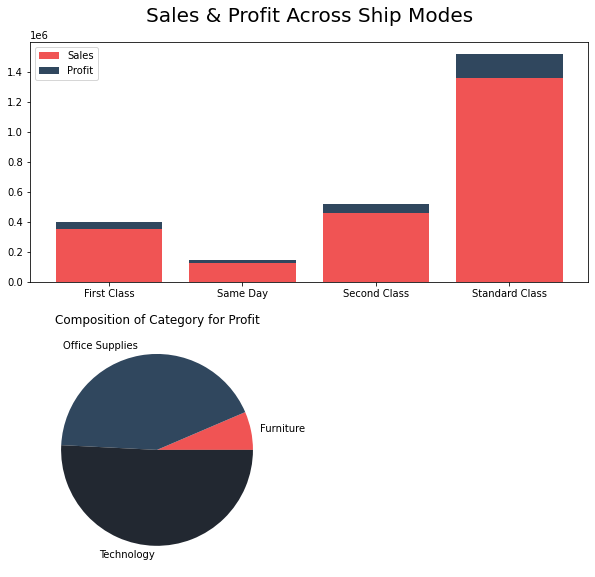

In [63]:
#Taking a subset of data (To keep things simple)
df_stackb = df[['Ship Mode','Sales','Profit']]
# taking a groupby on category and then ship mode...
df_stackb = df_stackb.groupby(['Ship Mode']).sum().reset_index()
print(df_stackb)

# Visualizing the Stacked BarChart
plt.figure(figsize=[10,15])
plt.subplot(3,1,1)
plt.bar(x=df_stackb['Ship Mode'], height=df_stackb['Sales'], color='#F05454')
plt.bar(x=df_stackb['Ship Mode'], height=df_stackb['Profit'], bottom=df_stackb['Sales'], color='#30475E')
plt.title("Sales & Profit Across Ship Modes", size=20, pad=20)
plt.legend(['Sales','Profit'])

# Taking a subset of data (To keep things simple)
df_pie = df[['Category','Sales','Profit']]
# taking a groupby on category and then ship mode...
df_pie = df_pie.groupby(['Category']).sum().reset_index()

# Visualizing the Pie Chart (Profit)
plt.subplot(3,2,3)
plt.pie(df_pie['Profit'], labels=df_pie['Category'], colors=['#F05454','#30475E','#222831','#DDDDDD'])
plt.title("Composition of Category for Profit")

# Visualizing the Pie Chart (Sales)
# plt.subplot(3,2,4)
# plt.pie(df_pie['Sales'], labels=df_pie['Category'], colors=['#F05454','#30475E','#222831','#DDDDDD'])
# plt.title("Composition of Category for Sales")

#### As per the above chart, we can conclude that most of our cusotmers are of standard class category. So, we should nbe catering to the range, budget and segment as per their requirements first and then others.